In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import pickle
from ipywidgets import interact

log_dir = '../data/data-20240107-161231/'

%matplotlib inline

## Compare joy and servo

In [2]:
joy_topic = pd.read_csv(log_dir + 'joy_topic.csv')
servo_topic = pd.read_csv(log_dir + 'servo_topic.csv')
joy_topic['time'] /= 100
servo_topic['time'] /= 100
command_time = []
command_steer = []
for log_num in range(0, 337):
    with open(os.path.join(log_dir, f"log{log_num}.pkl"), "rb") as f:
        data = pickle.load(f)
    for d_t in data:
        command_time.append(d_t['time'])
        command_steer.append(d_t['steering'])
command_time = np.array(command_time) * 1e7
# command_time = command_time.astype(int)
command_steer = np.array(command_steer)

In [20]:
# MIN_TIME = min(joy_topic['time'][0], servo_topic['time'][0], command_time[0])
# min(joy_topic['time'][0], servo_topic['time'][0])

MIN_TIME = 1704662016.0204804 * 1e7

In [21]:
MIN_TIME

1.7046620160204804e+16

In [22]:
joy_time = (joy_topic['time'] - MIN_TIME) / 1e7
joy_val = joy_topic[f'field.axes2']
servo_time = (servo_topic['time'] - MIN_TIME) /1e7
servo_val = servo_topic['field.data']
cmd_time = (command_time - MIN_TIME) /1e7
cmd_val = command_steer + .0

In [23]:
joy_time[1]

-25.5164272

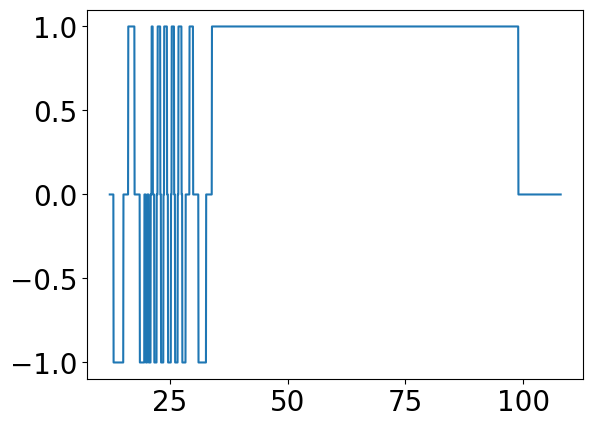

In [123]:
plt.plot(cmd_time[1500:], cmd_val[1500:]*(-1.), label='command')


In [89]:
def plot(a=-.32, b=.53):
    plt.rcParams.update({'font.size': 20})

    plt.figure(figsize=(40, 5))
    plt.plot(joy_time[680:720], joy_val[680:720]*(-.32)+.53, label='joy topic', color='green', linewidth=2)
    clip_servo = np.clip(servo_val[2600:2750], np.min(joy_val[355:420]*(-.32)+.53), 1)
    plt.plot(servo_time[2600:2750], clip_servo, label='servo position')
    plt.scatter(cmd_time[1410:1450], cmd_val[1410:1450]*(-.322)+.528, label='command', linestyle='dotted', color='red', alpha=1., s=10)
    # plt.plot( servo_val[1200:1500])
    plt.legend()
    plt.xticks(np.arange(7.9, 9.8, 0.1))
    plt.xlim([7.9,9.8])
    plt.xlabel('time (s)')
    plt.ylabel('value')
interact(plot, 
         a = (-1, 1, 0.01),
         b = (-1, 1, 0.01),
        )

interactive(children=(FloatSlider(value=-0.32, description='a', max=1.0, min=-1.0, step=0.01), FloatSlider(val…

<function __main__.plot(a=-0.32, b=0.53)>

In [151]:
def plot(a=-.32, b=.53, shift=0.21):
    plt.rcParams.update({'font.size': 20})

    plt.figure(figsize=(200, 5))
    plt.plot(joy_time[630:920], joy_val[630:920]*(-.32)+.53, label='joy topic', color='green', linewidth=2)
    clip_servo = np.clip(servo_val[2400:3500], np.min(joy_val[355:420]*(-.32)+.53), 1)
    plt.plot(servo_time[2400:3500], clip_servo, label='servo position')
    plt.scatter(cmd_time[1410:1650], cmd_val[1410:1650]*(-.322)+.528, label='command', linestyle='dotted', color='red', alpha=1., s=10)
    # plt.plot( servo_val[1200:1500])

    real_move_list = np.array([5.35,7.00, 8.09,9.30, 10.41, 11.52, 13.09, 15.15, 16.15, 17.36, 18.45, 19.44]) + shift
    for p in real_move_list:
        print(p)
        plt.plot([p, p], [0, 1], color='cyan')
    # plt.scatter(np.array([5.35,8.09,9.30, 10.41, 11.52, 13.09, 15.15])+shift, [0.8,0.8,0.8, 0.8, 0.8, 0.8], marker='x')
    plt.legend()
    plt.xticks(np.arange(5, 20, 0.1))
    # plt.xlim([7.9,9.8])
    plt.xlabel('time (s)')
    plt.ylabel('value')
interact(plot, 
         a = (-1, 1, 0.01),
         b = (-1, 1, 0.01),
         shift=(0, 1, 0.01),
        )

interactive(children=(FloatSlider(value=-0.32, description='a', max=1.0, min=-1.0, step=0.01), FloatSlider(val…

<function __main__.plot(a=-0.32, b=0.53, shift=0.21)>

In [109]:
5.35
7.00
8.09
9.30
10.41
11.52
13.09
15.15
16.15
17.36
18.45
19.44

102422304

5.35
8.09
9.3
10.41
11.52
13.09
15.15


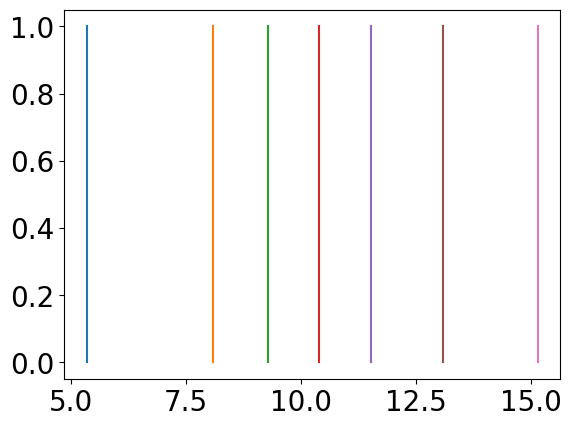

In [118]:
real_move_list = np.array([5.35,8.09,9.30, 10.41, 11.52, 13.09, 15.15])
for p in real_move_list:
    print(p)
    plt.plot([p, p], [0, 1])

In [113]:
joy_topic['time'][1] - joy_topic['time'][0]

5543872

In [280]:
command_time = []
command_steer = []
for log_num in range(0, 337):
    with open(os.path.join(log_dir, f"log{log_num}.pkl"), "rb") as f:
        data = pickle.load(f)
    for d_t in data:
        command_time.append(d_t['time'])
        print(d_t['time'])
        command_steer.append(d_t['steering'])
command_time = np.array(command_time) * 10000000
command_time = command_time.astype(int)
command_steer = np.array(command_steer)

1704662016.020480480
1704661951.6599176

1704661951.6599176
1704661951.7103143
1704661951.7607043
1704661951.811081
1704661951.8617911
1704661951.9125066
1704661951.9631588
1704661952.0137813
1704661952.0644257
1704661952.115161
1704661952.1662586
1704661952.2195892
1704661952.2702377
1704661952.320888
1704661952.3715613
1704661952.4222898
1704661952.4728377
1704661952.5235283
1704661952.5743163
1704661952.6249685
1704661952.6755743
1704661952.729303
1704661952.7799602
1704661952.8305998
1704661952.8812804
1704661952.9321218
1704661952.9828053
1704661953.033567
1704661953.084298
1704661953.1350436
1704661953.185697
1704661953.240008
1704661953.2906153
1704661953.341195
1704661953.3919163
1704661953.442546
1704661953.4931831
1704661953.5438168
1704661953.594374
1704661953.6449842
1704661953.6958022
1704661953.749681
1704661953.8003266
1704661953.8510458
1704661953.9018593
1704661953.9525065
1704661954.0031552
1704661954.0537891
1704661954.1044056
1704661954.1550672
1704661954.2057242
1704661954.257857
1704661954.308498
1704661

In [177]:
command_time[0]

17046619516599176

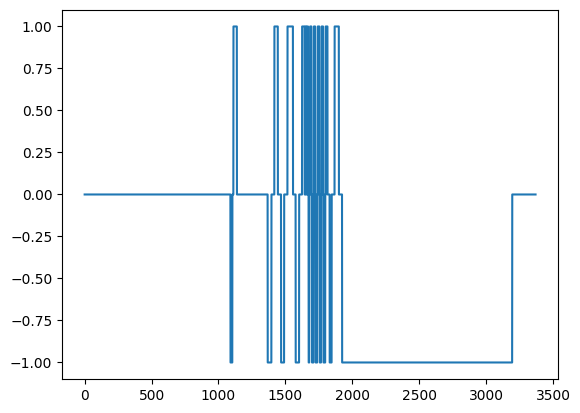

In [188]:
plt.plot(command_steer)